# Imbalanced Datasets

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

When we are working in classification problems one of the principal issues is when the label associated to one class is much smaller in proportion to other class. We called this datasets as "Imbalanced Dataset". The problem of this kind of datasets is for example when you are training an algorithm from a datasets which have 90% of label 0 and 10% of label 1 and the algorithm simply predict always the value 0. If you are using the "accuracy metric" you can see its have a value of 90% (very good) but in fact the algorithm is no such good because don't know discriminate when a label 1 appears. This says us that accuracy is no a good metric for imbalanced classification problems. As you can think a way to solve this problem is add more examples with the label 1. But how?

There is mainly 3 ways to add more example and we going to explain in this notebook.

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv('credit_card.csv')

In [5]:
df['Class'].value_counts()

0    2843
1     492
Name: Class, dtype: int64

In [6]:
round(df['Class'].value_counts(normalize = True)*100, 2)

0    85.25
1    14.75
Name: Class, dtype: float64

In [7]:
cols_X = list(df.columns)
cols_X.remove('Class')
cols_y = ['Class']

In [8]:
X = df[cols_X]
y = df[cols_y]

# 1. Undersampling

You desire is have a dataset with the same number of examples for each class. On undersampling you maintain all the examples of the minority class ($N_{min}$) and you sample the majority class choosing randomly $N_{min}$ elements.

Now we going to explain this method.

You start having this dataset.

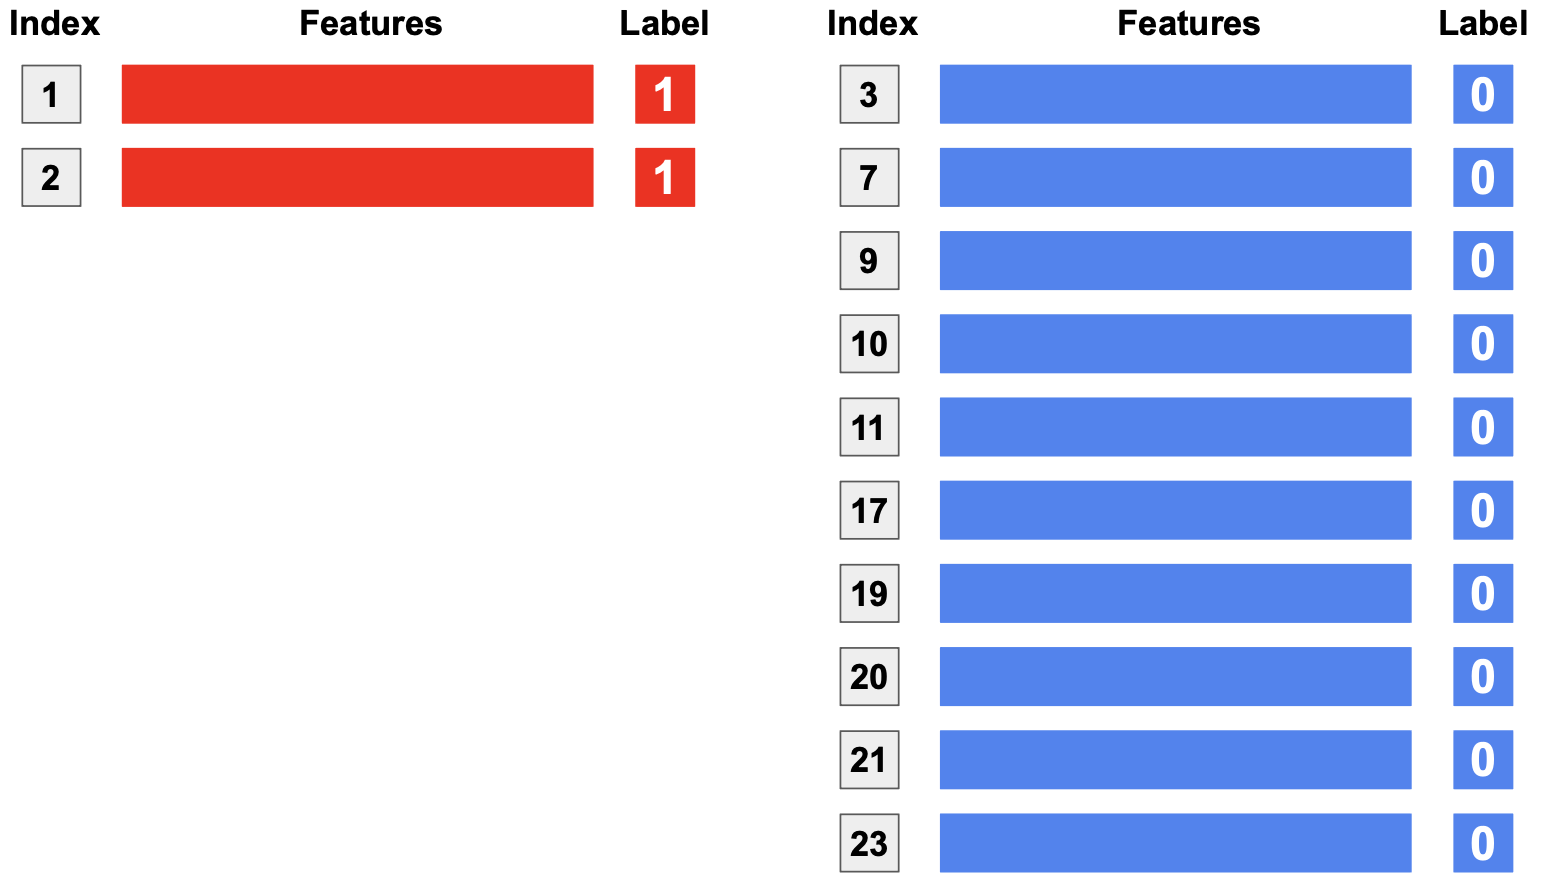

Then you have the next dataset.

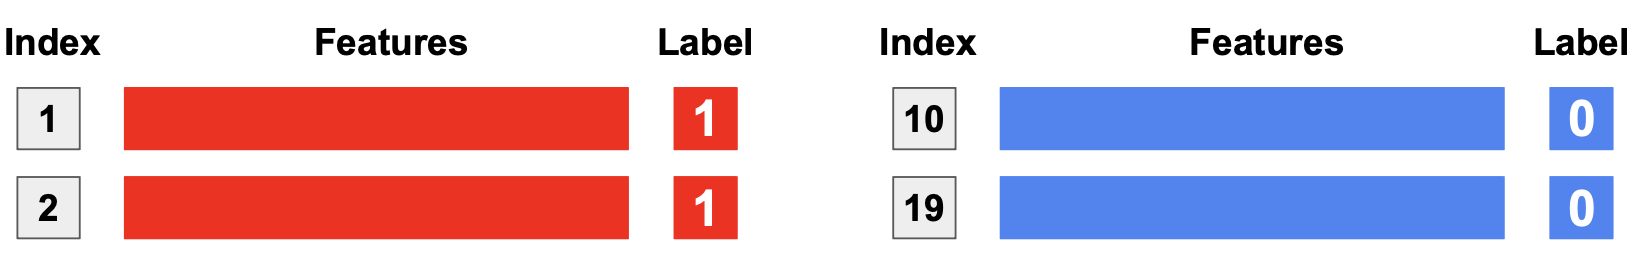

In [9]:
undersample = RandomUnderSampler(random_state = 0)

In [10]:
X_us, y_us = undersample.fit_resample(X, y)

In [11]:
y_us.value_counts()

Class
0        492
1        492
dtype: int64

In [12]:
round(y_us.value_counts(normalize = True)*100, 2)

Class
0        50.0
1        50.0
dtype: float64

# 2. Oversampling

You desire is have a dataset with the same number of examples for each class. On oversampling you maintain all the examples of the majority class ($N_{max}$) and duplicates the examples of the minority class till make a balanced dataset.

Now we going to explain this method.

You start having this dataset.

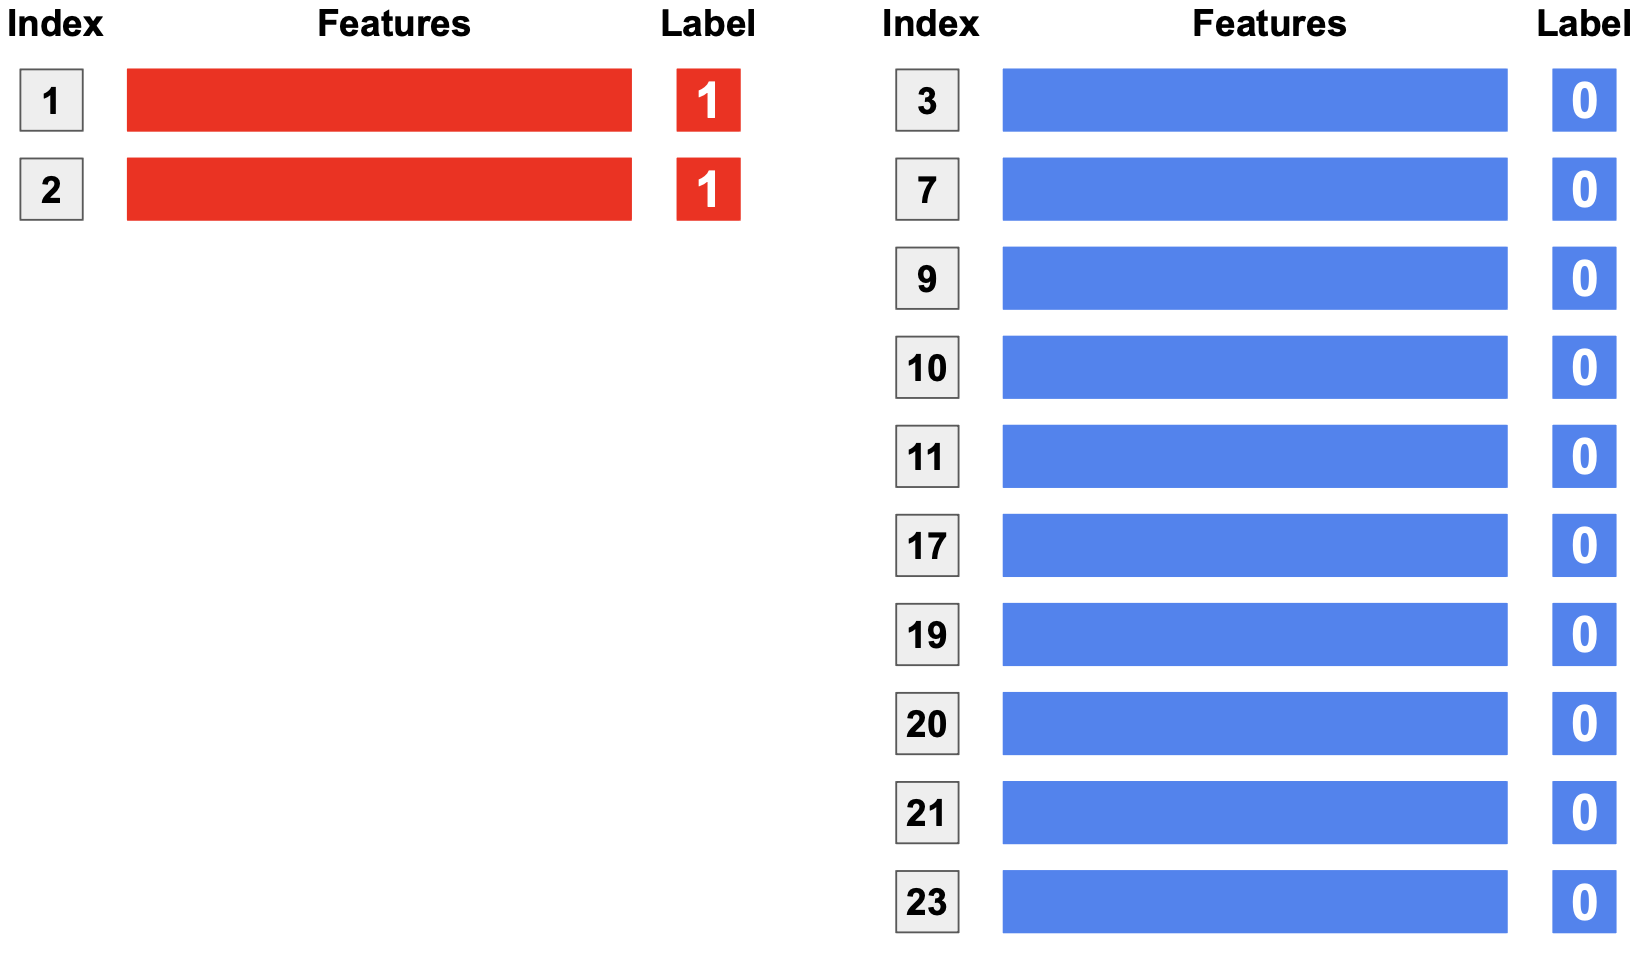

Then you have the next dataset.

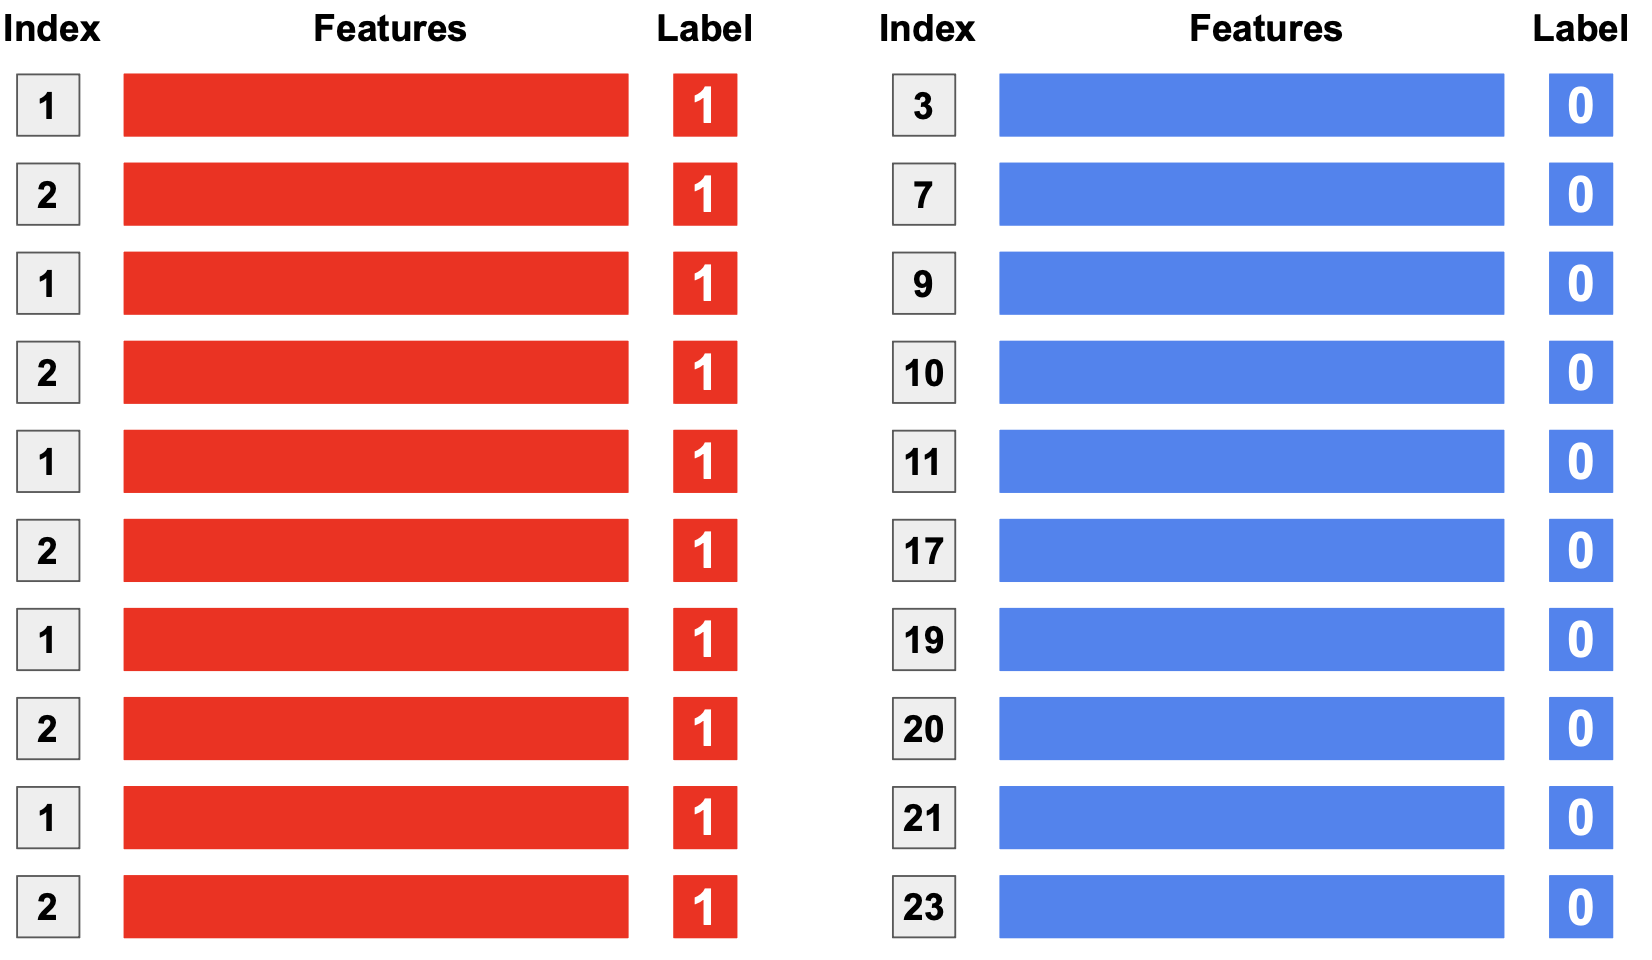

In [13]:
oversample = RandomOverSampler(random_state = 0)

In [14]:
X_os, y_os = oversample.fit_resample(X, y)

In [15]:
y_os.value_counts()

Class
0        2843
1        2843
dtype: int64

In [16]:
round(y_os.value_counts(normalize = True)*100, 2)

Class
0        50.0
1        50.0
dtype: float64

# 3. SMOTE

### Synthetic Minority Oversampling Technique

You desire is have a dataset with the same number of examples for each class. On SMOTE you maintain all the examples of the majority class ($N_{max}$) and the minority class ($N_{min}$) but here we create $N_{max} - N_{min}$ points of synthetic form till make a balanced dataset.

### Steps for SMOTE

1. You choose a random sample for the minority class.
2. For the points chosen you identify the k-nearest neighbors. 
3. For build a synthetic point you have to choose a point on the sample ($\vec{v_1}$) and then build a vector between this and one of k-nearest neighbors ($\vec{v_2}$). The vector will be: $ \vec{d} = \vec{v_2} - \vec{v_1} $.
4. Choose $ \alpha $ randomly in the interval $ (0, 1) $ and then build the vector $ \vec{c} = \alpha \cdot \vec{d} $.
5. The synthetic point will be $ \vec{v_3} = \vec{v_1} + \vec{c} $.

Now we going to explain this with images.

You start having this dataset.

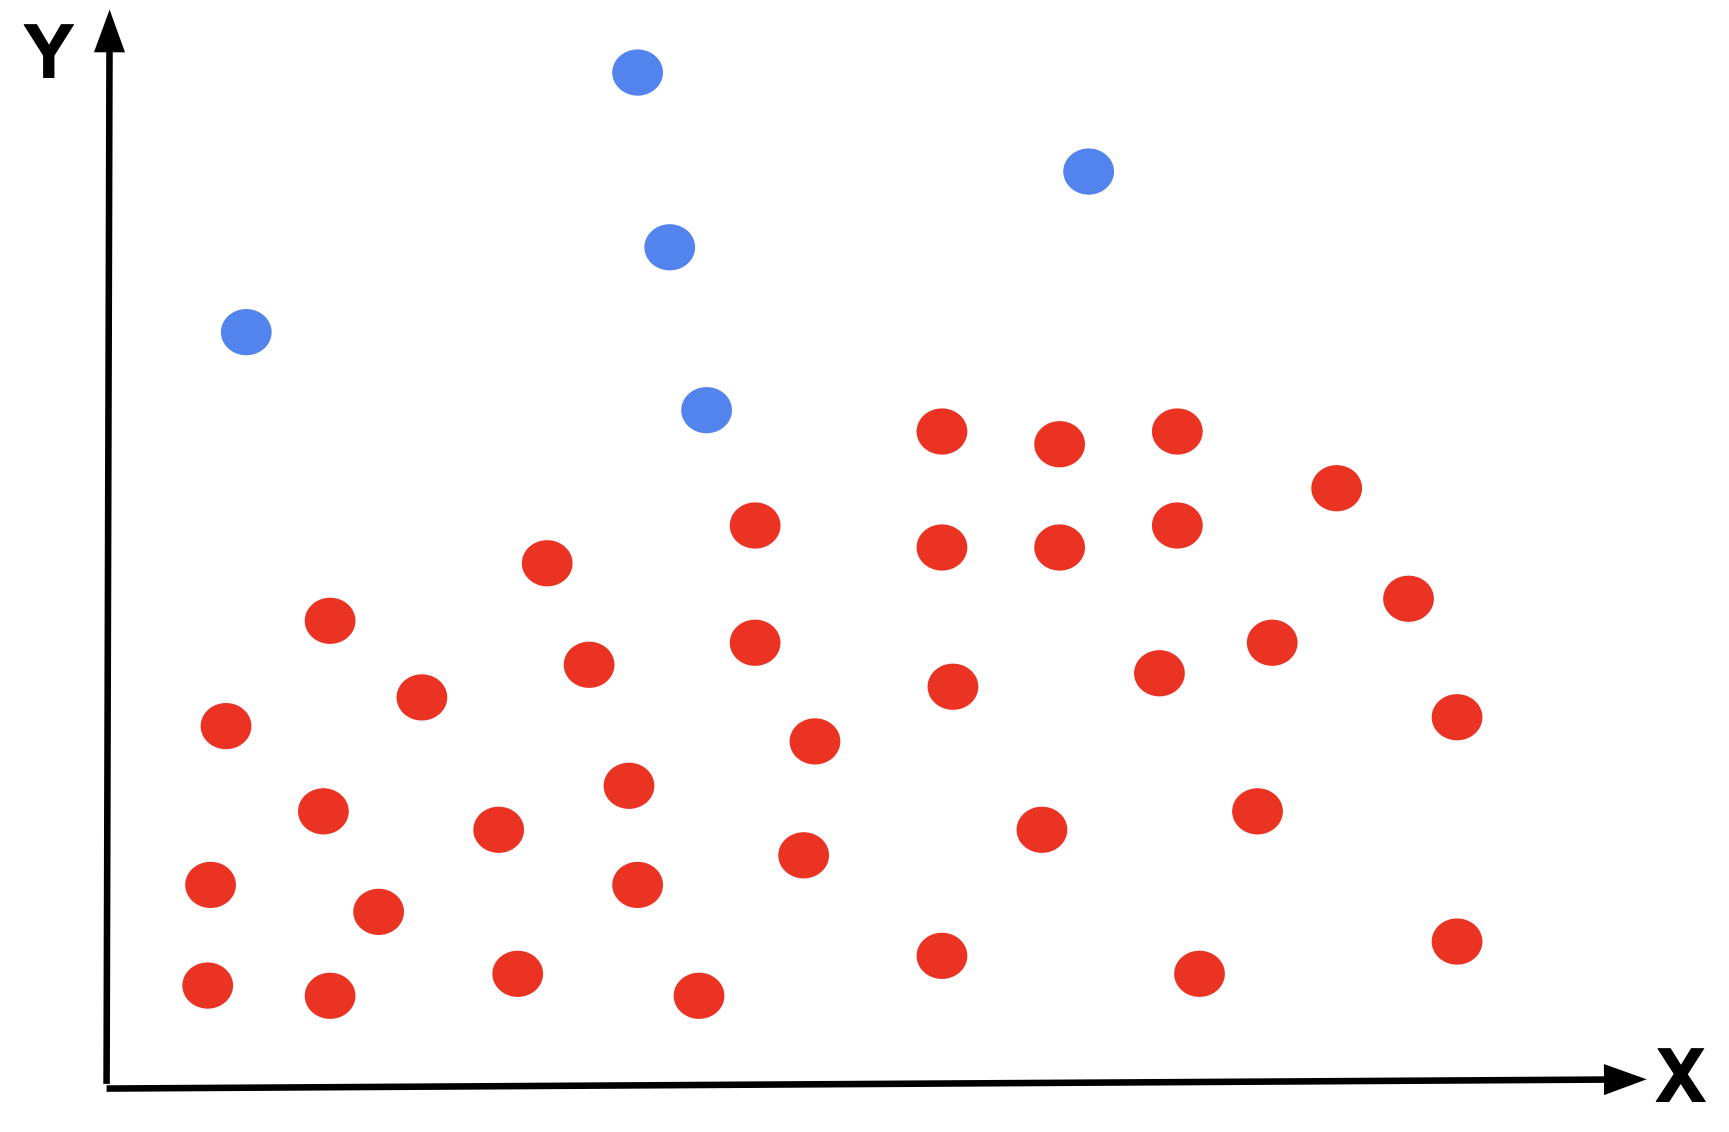

You can see the blue points are the minority class and the red points are the majority class.

Now we going to consider only the points from the minority class.

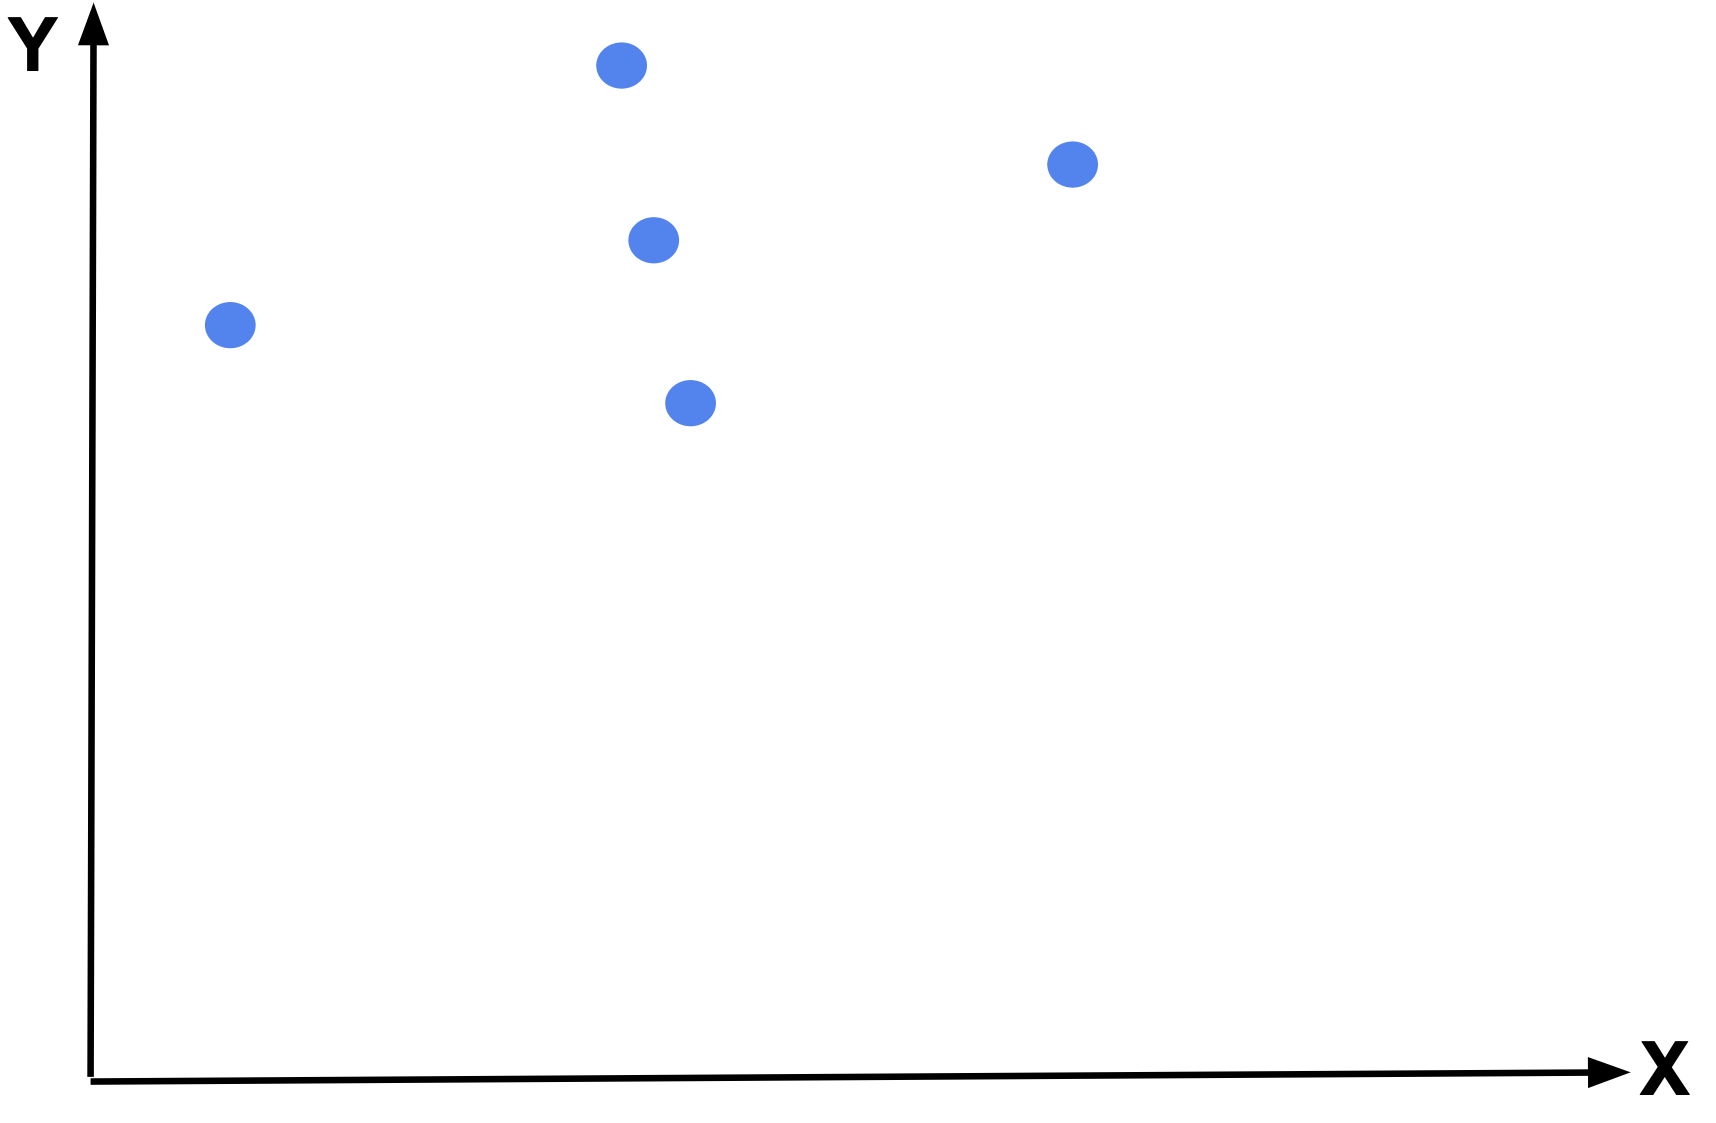

We going to apply the SMOTE method in this points. First of all we choose one point (green point $ \vec{v_1}$) from all this blue points.

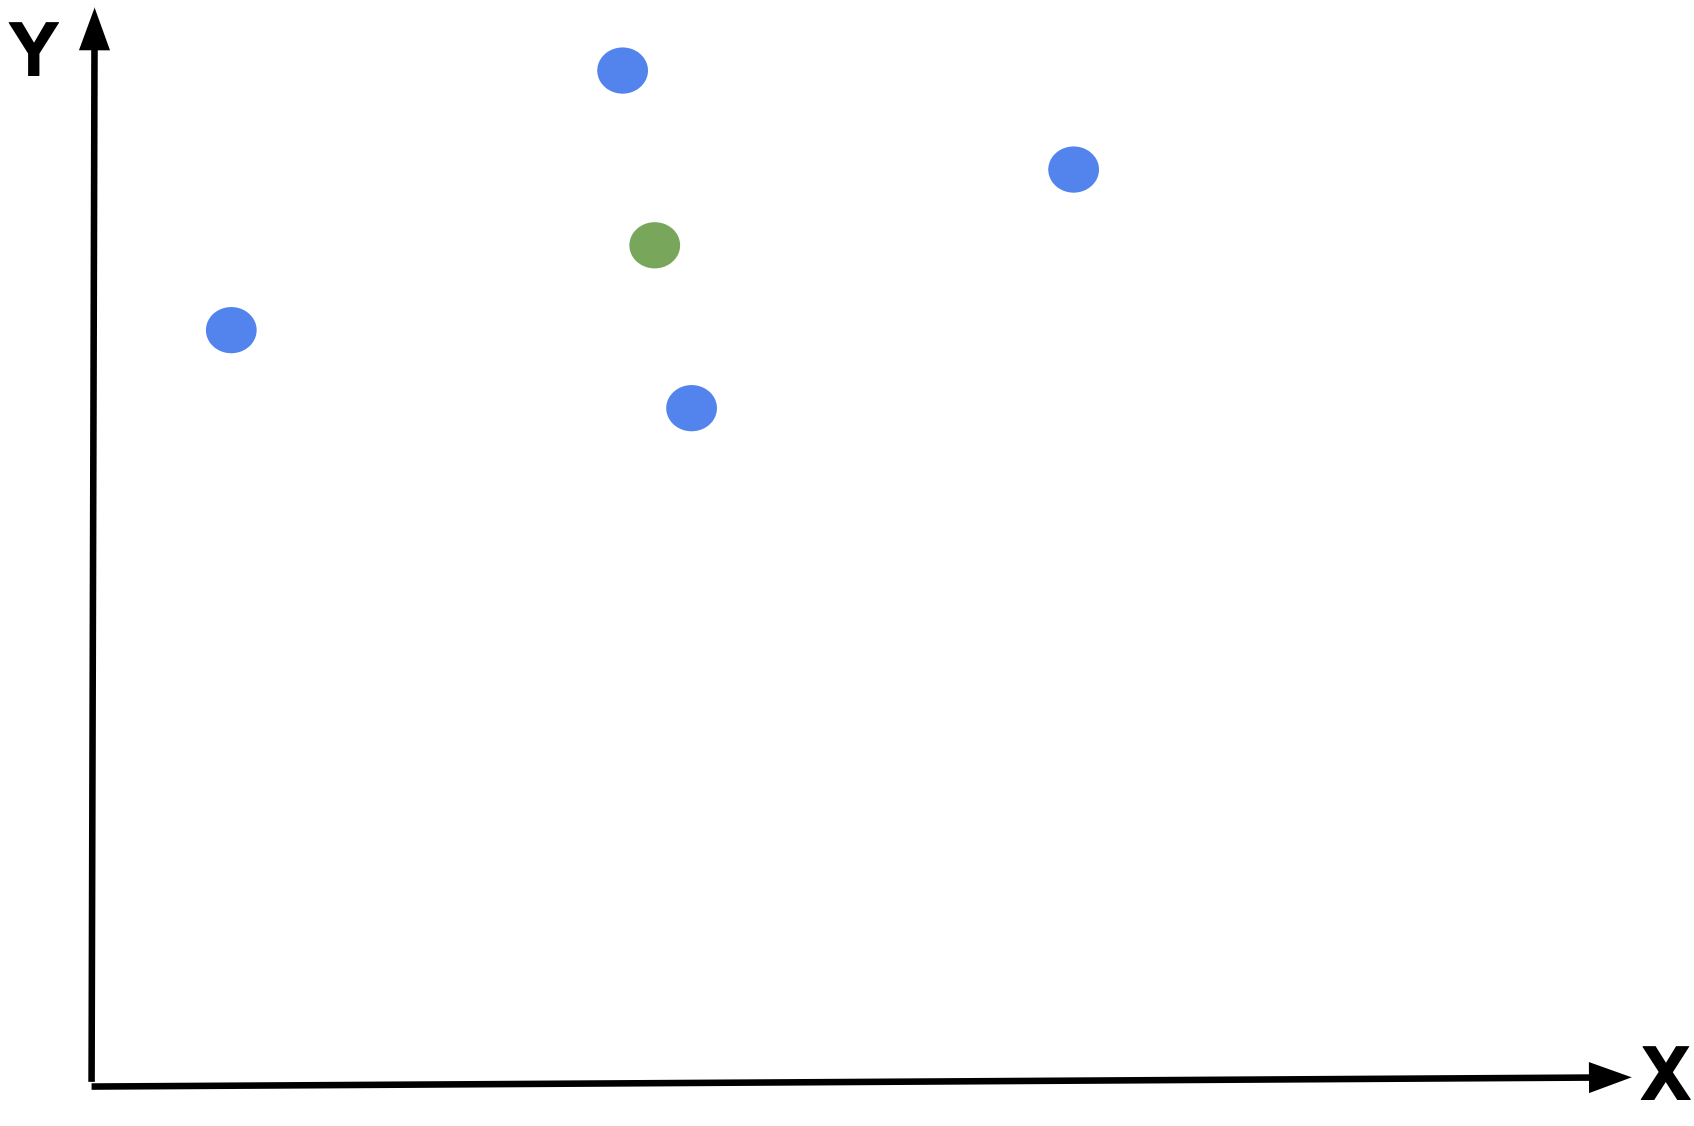

Lets consider the $ K = 4 $ nearest neighbors. You can see that this neighbors are the others blue points.

We choose one of this neighbors and we called him $ \vec{v_2} $.

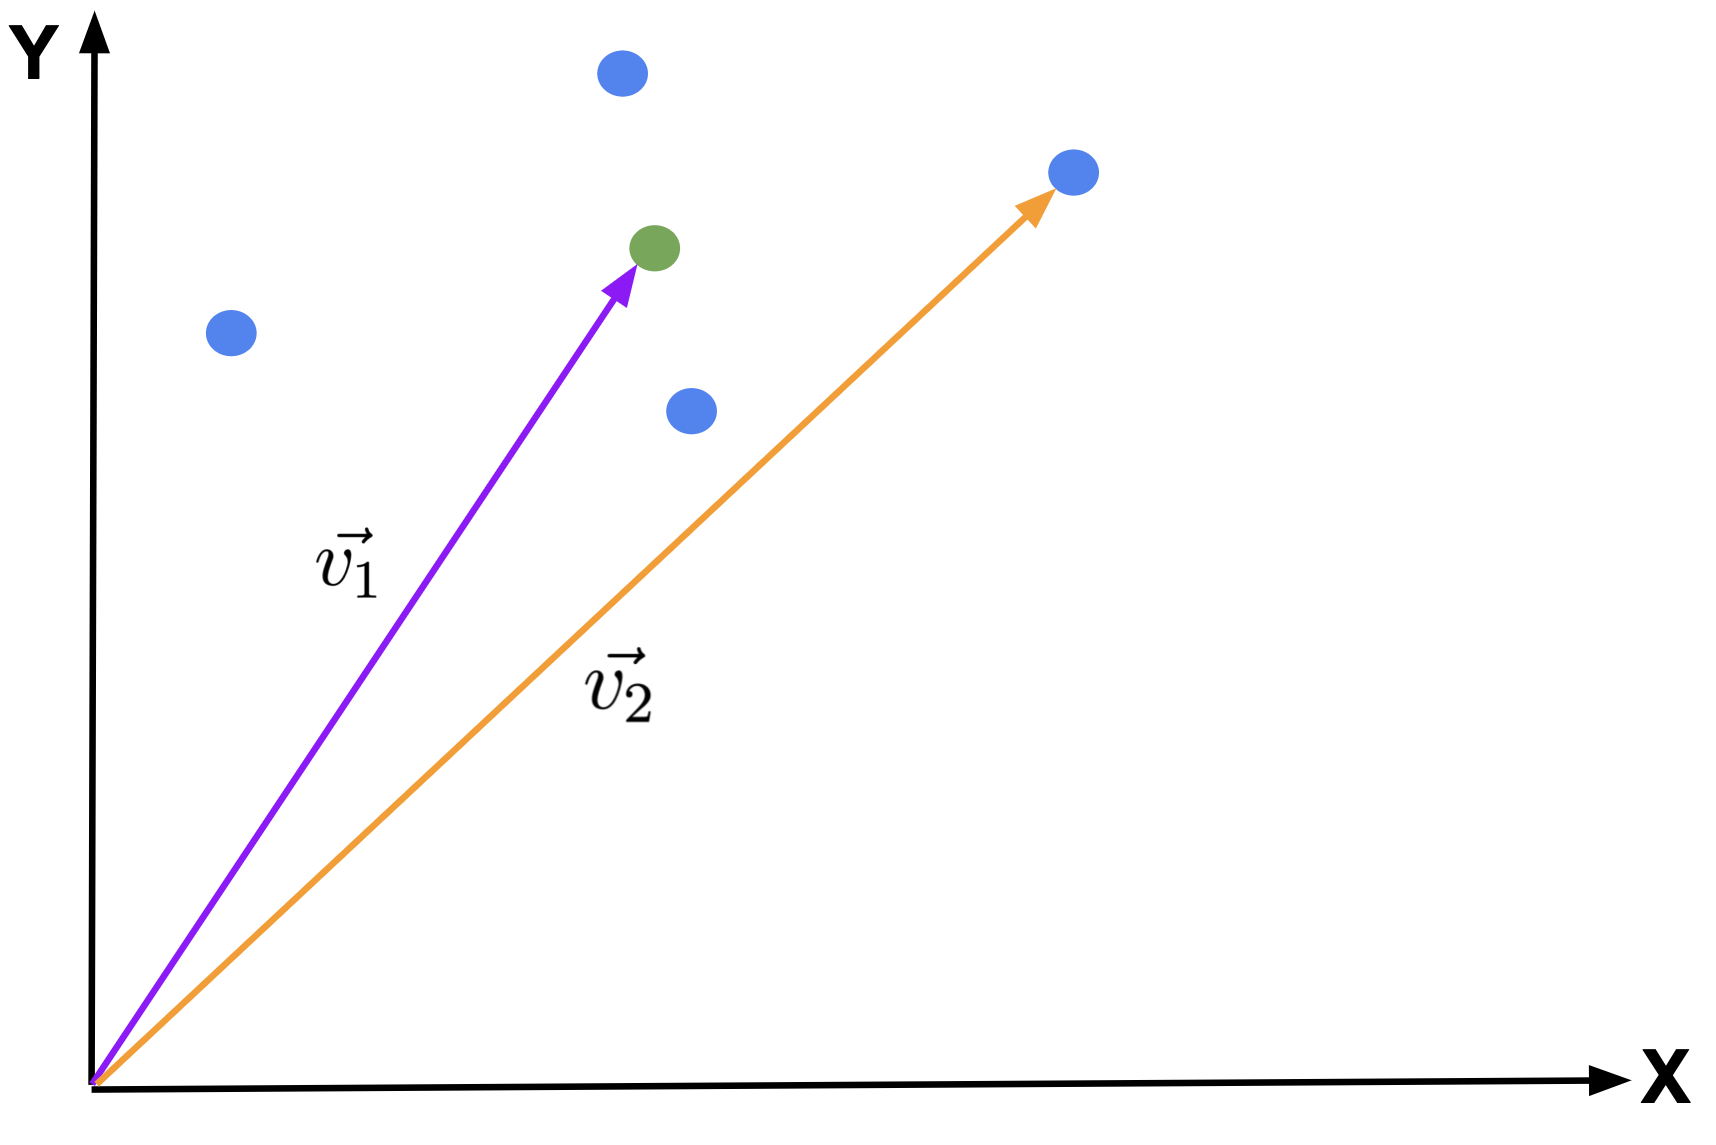

Now we going to compute the vector $ \vec{d} = \vec{v_2} - \vec{v_1} $.

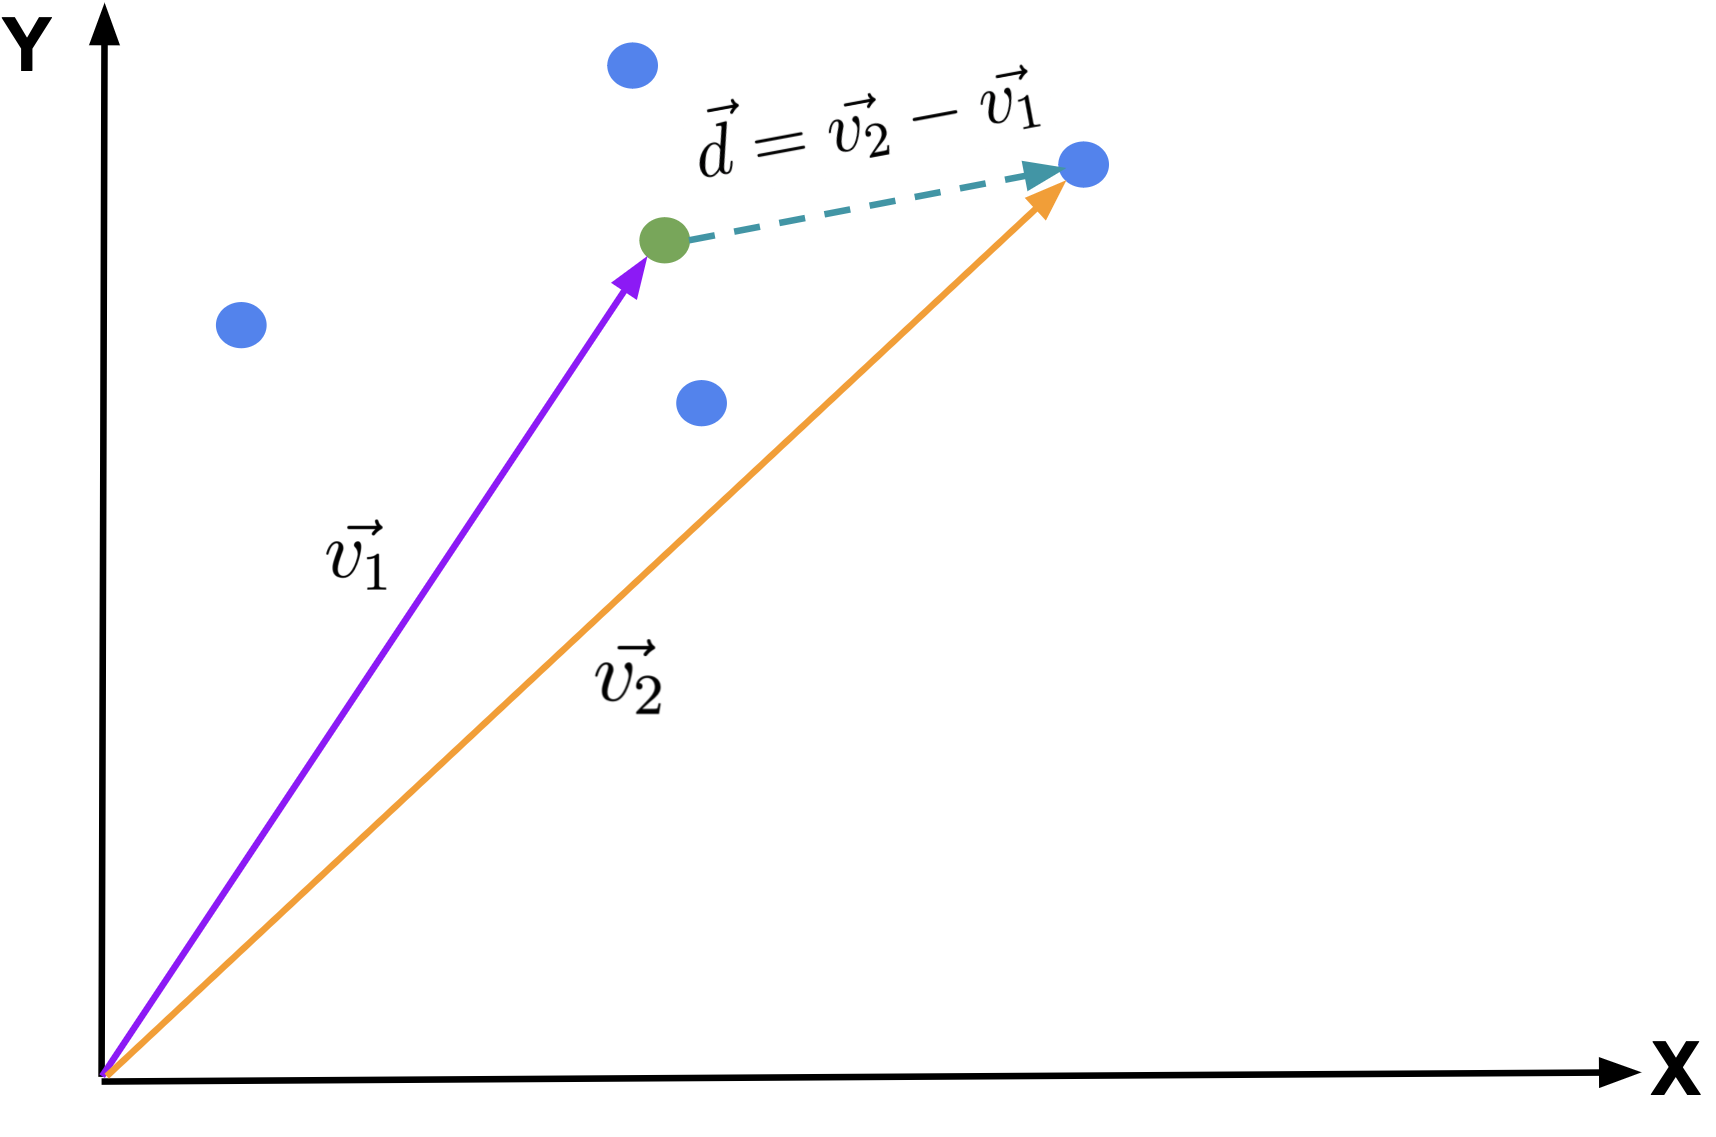

Now only consider the vectors $ \vec{v_1} $ and $ \vec{d} $. 

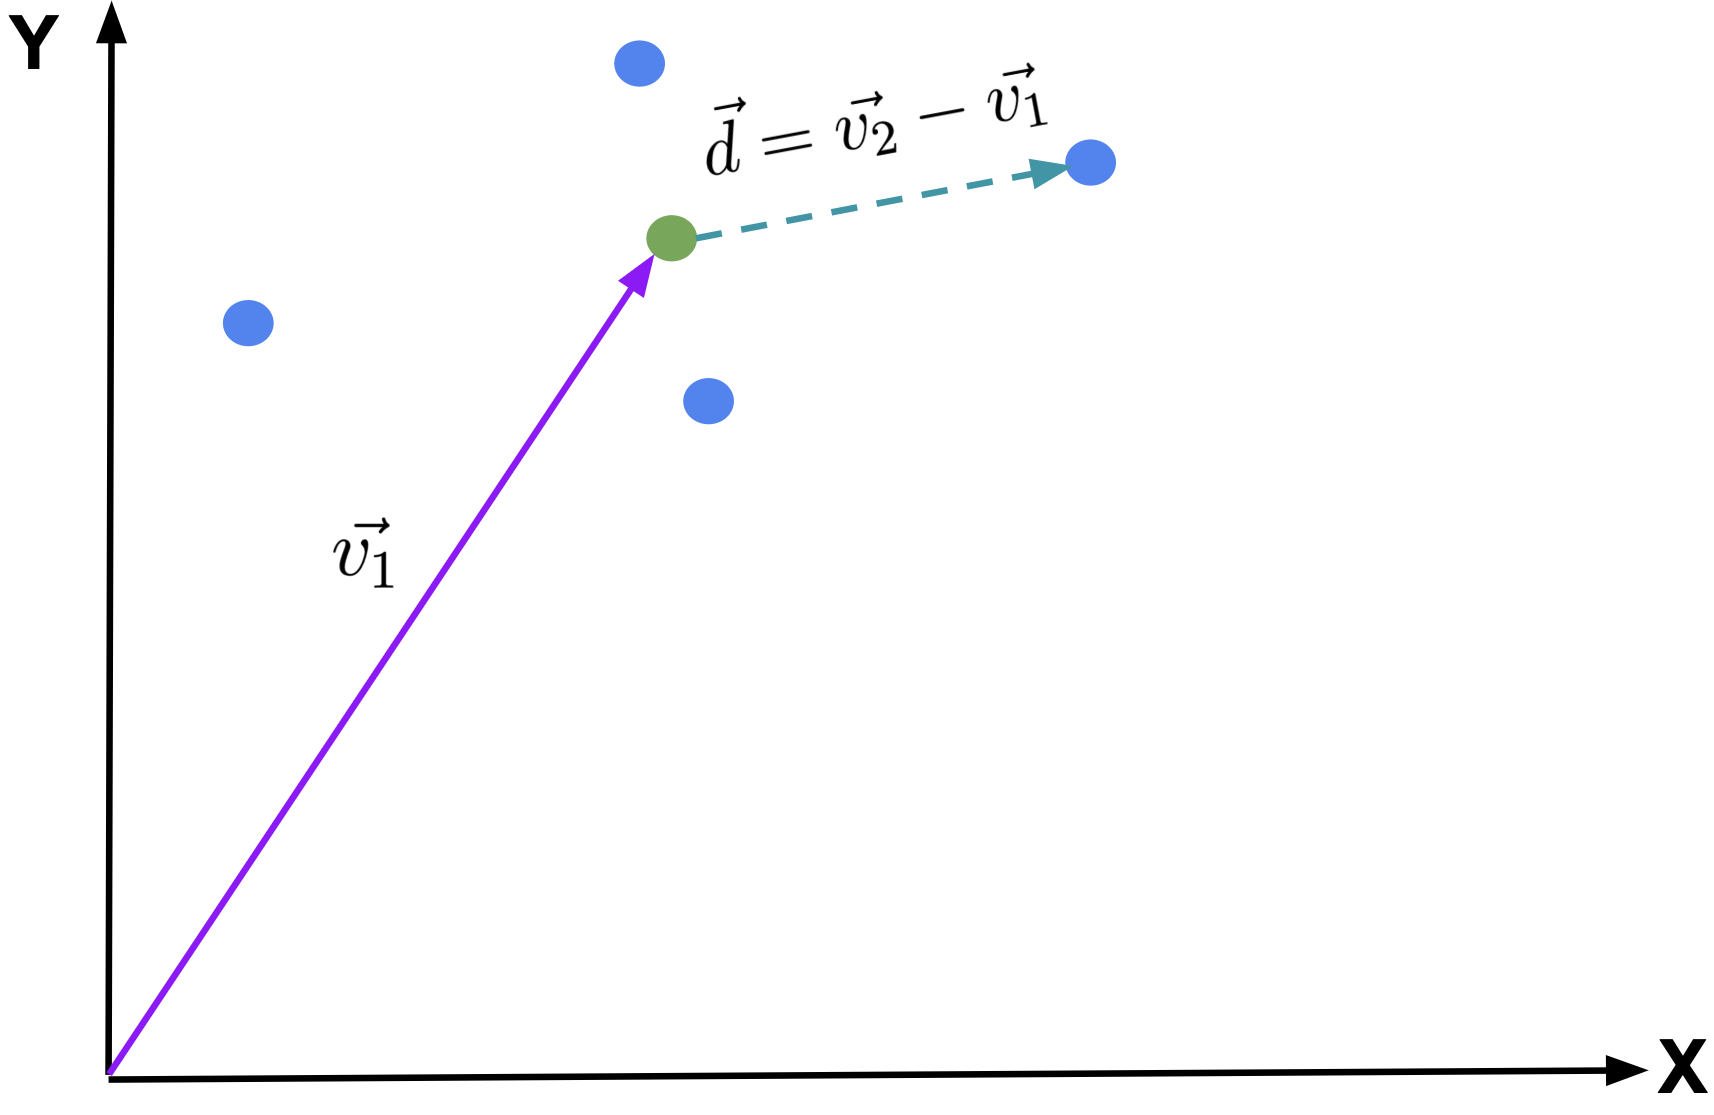

Now we have to choose randomly a number between $0$ and $1$ ($\alpha \in (0, 1)$), and multiply the vector $ \vec{d} $ by $ \alpha $ to obtain $ \vec{c} $.

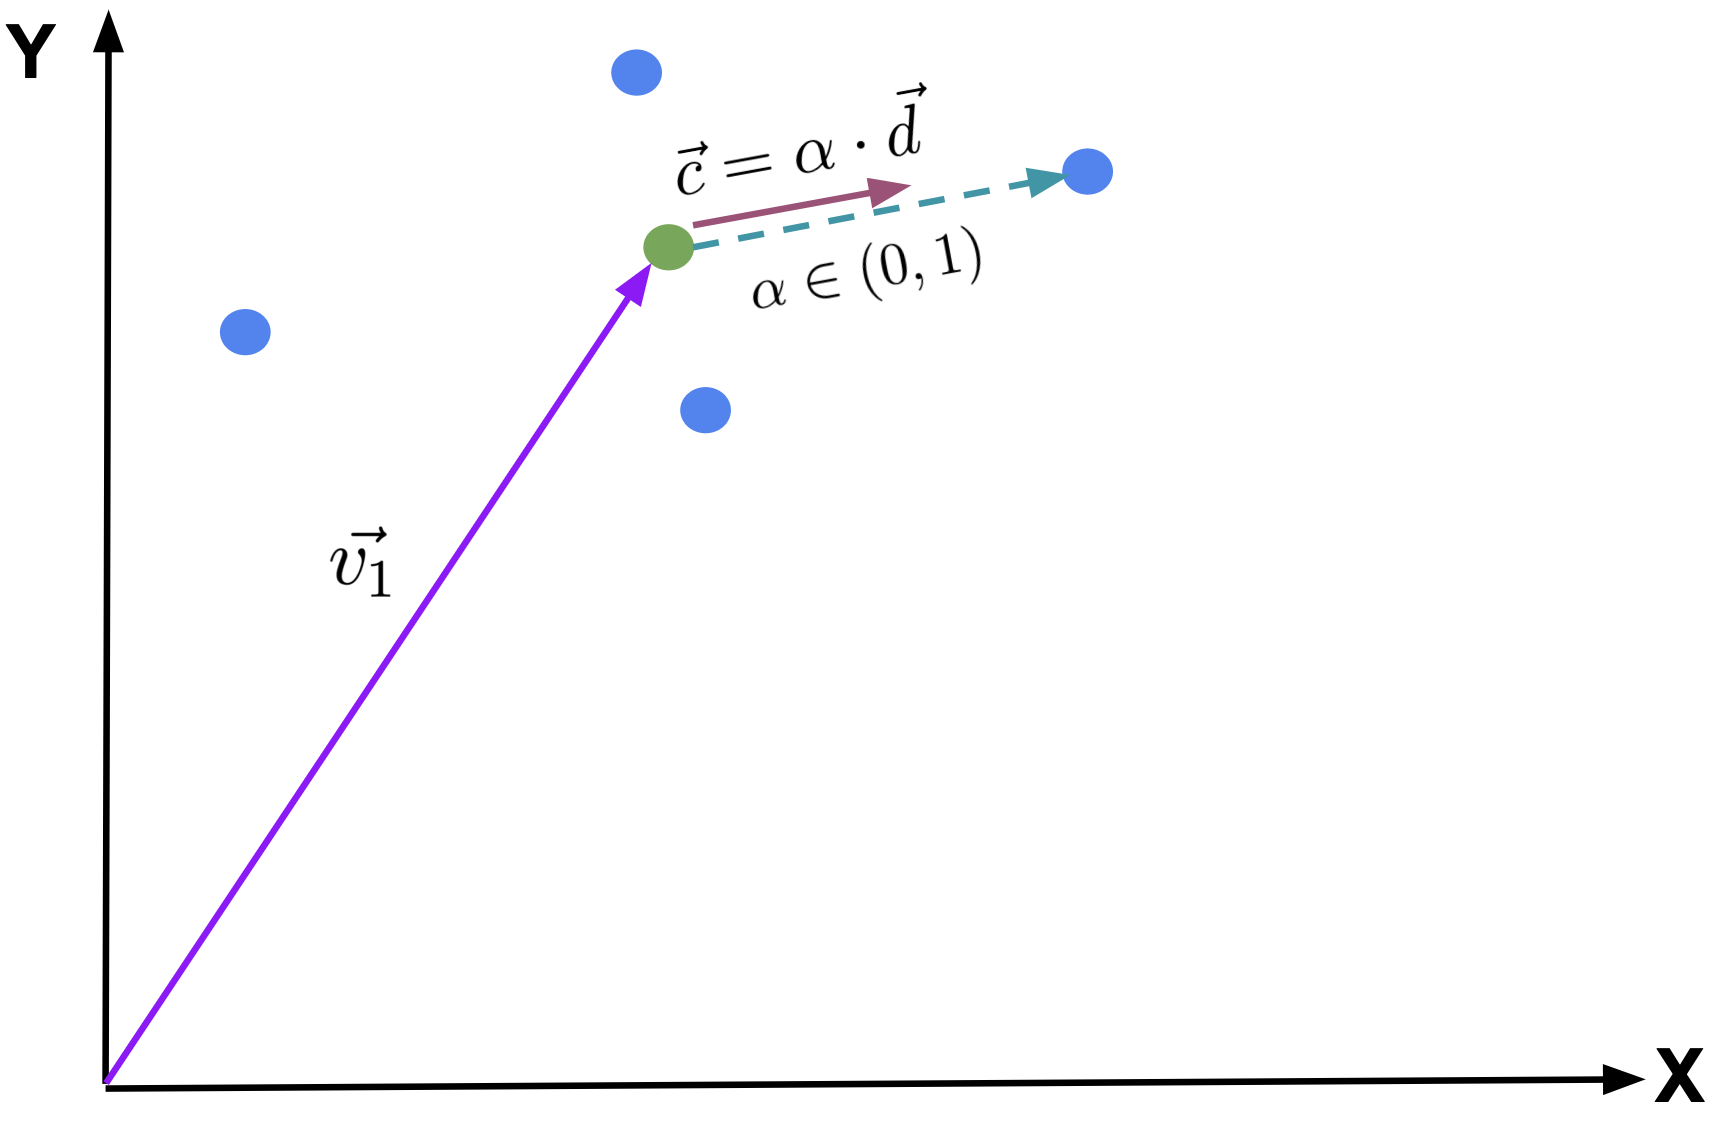

Now only consider the vectors $ \vec{v_1} $ and $ \vec{c} $. 

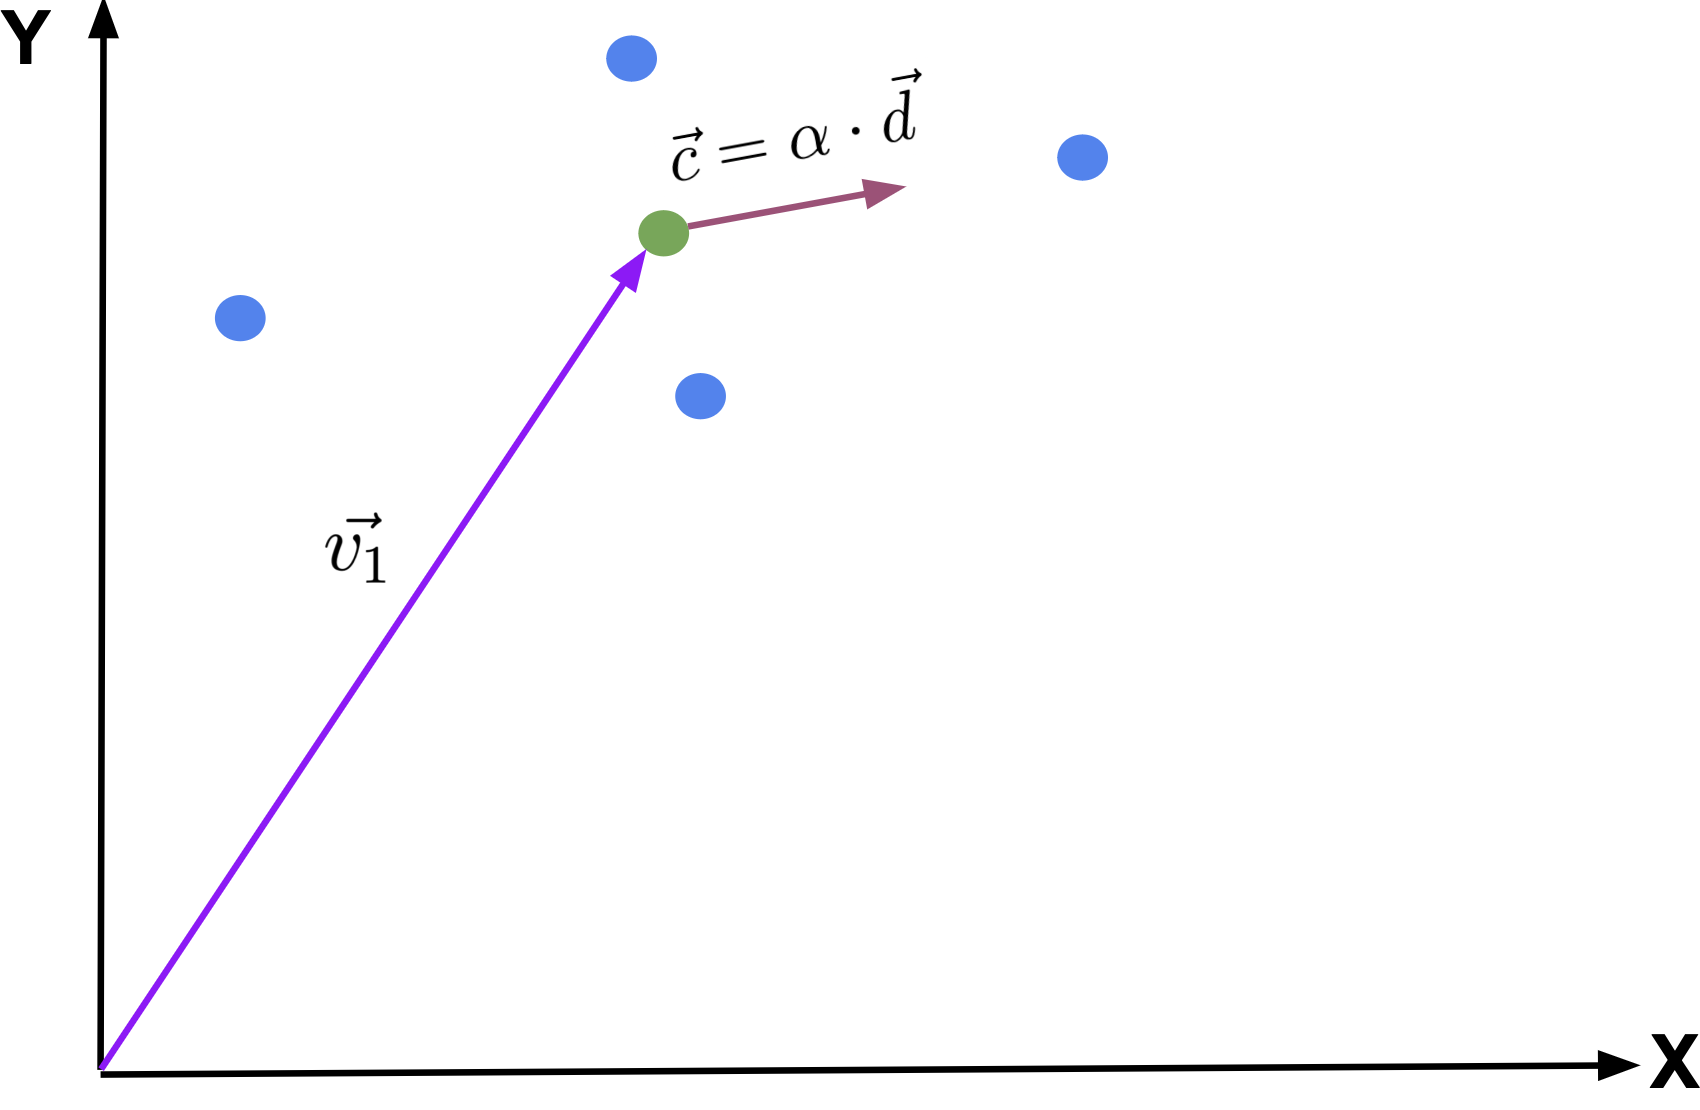

Now compute the vector $ \vec{v_3} = \vec{v_1} + \vec{c} $.

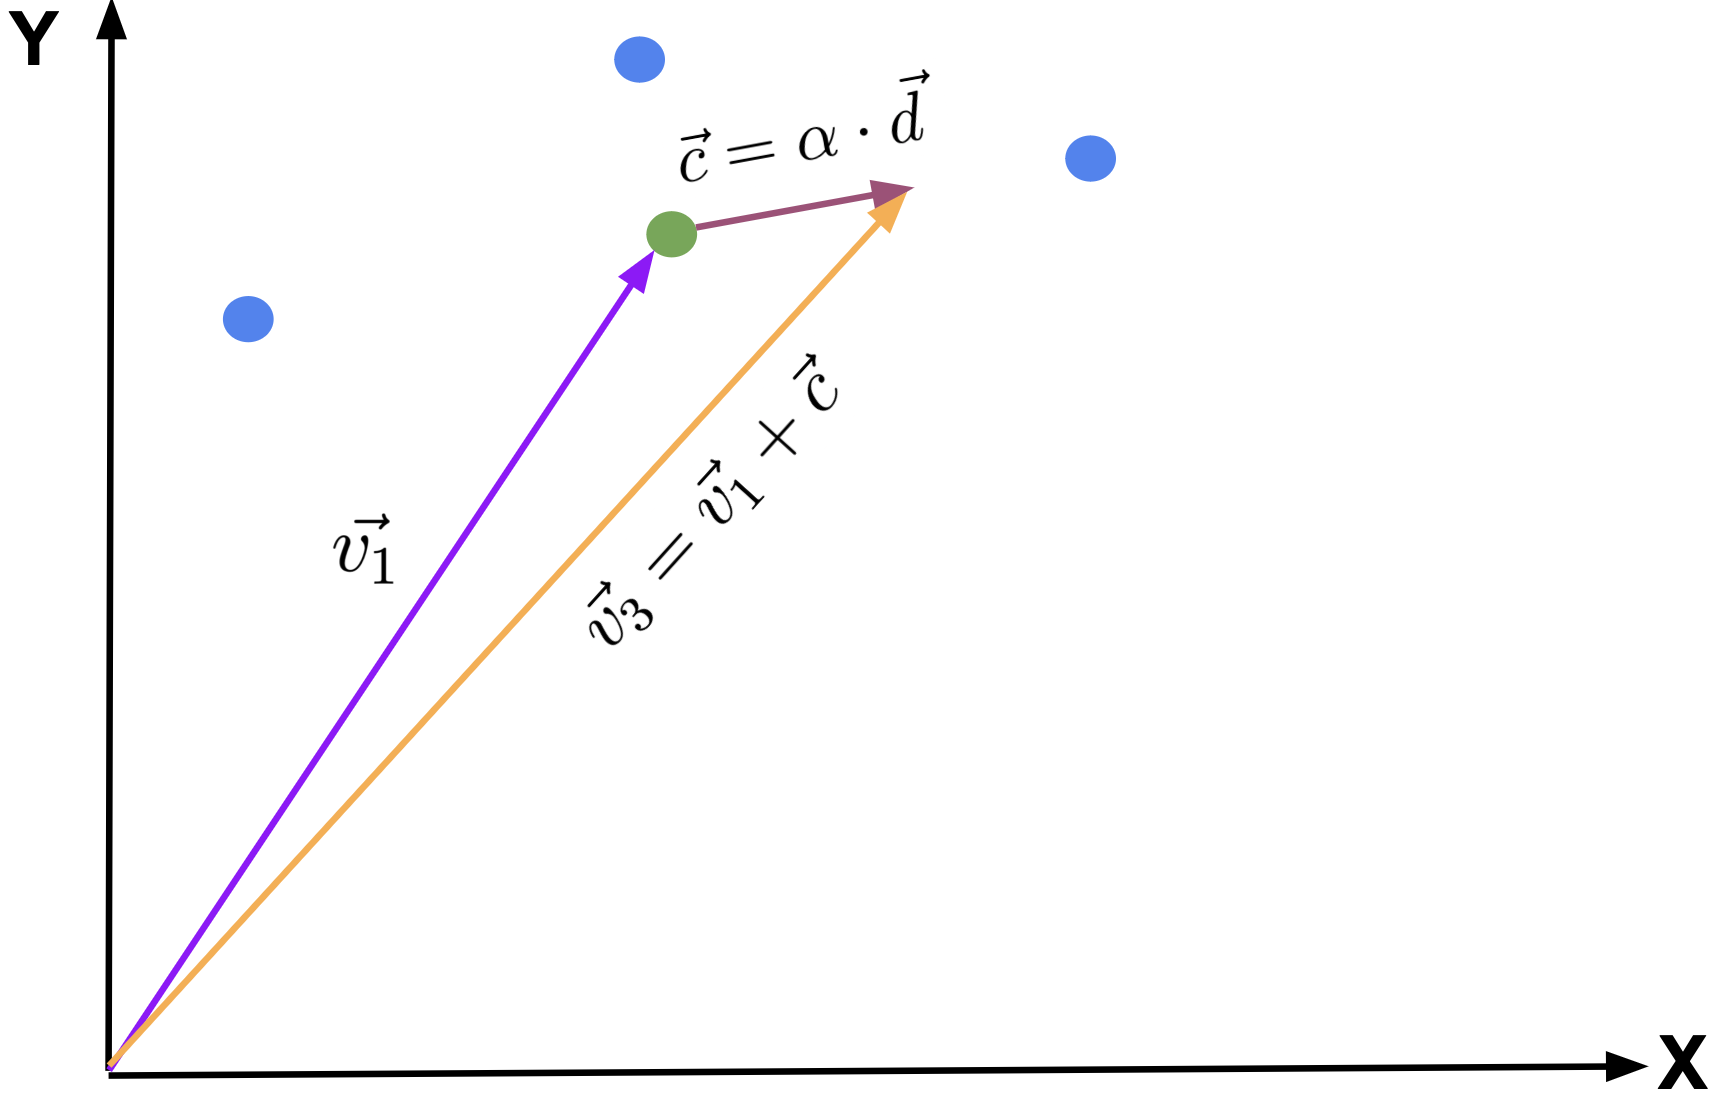

The vector $ \vec{v_3} $ create a point.

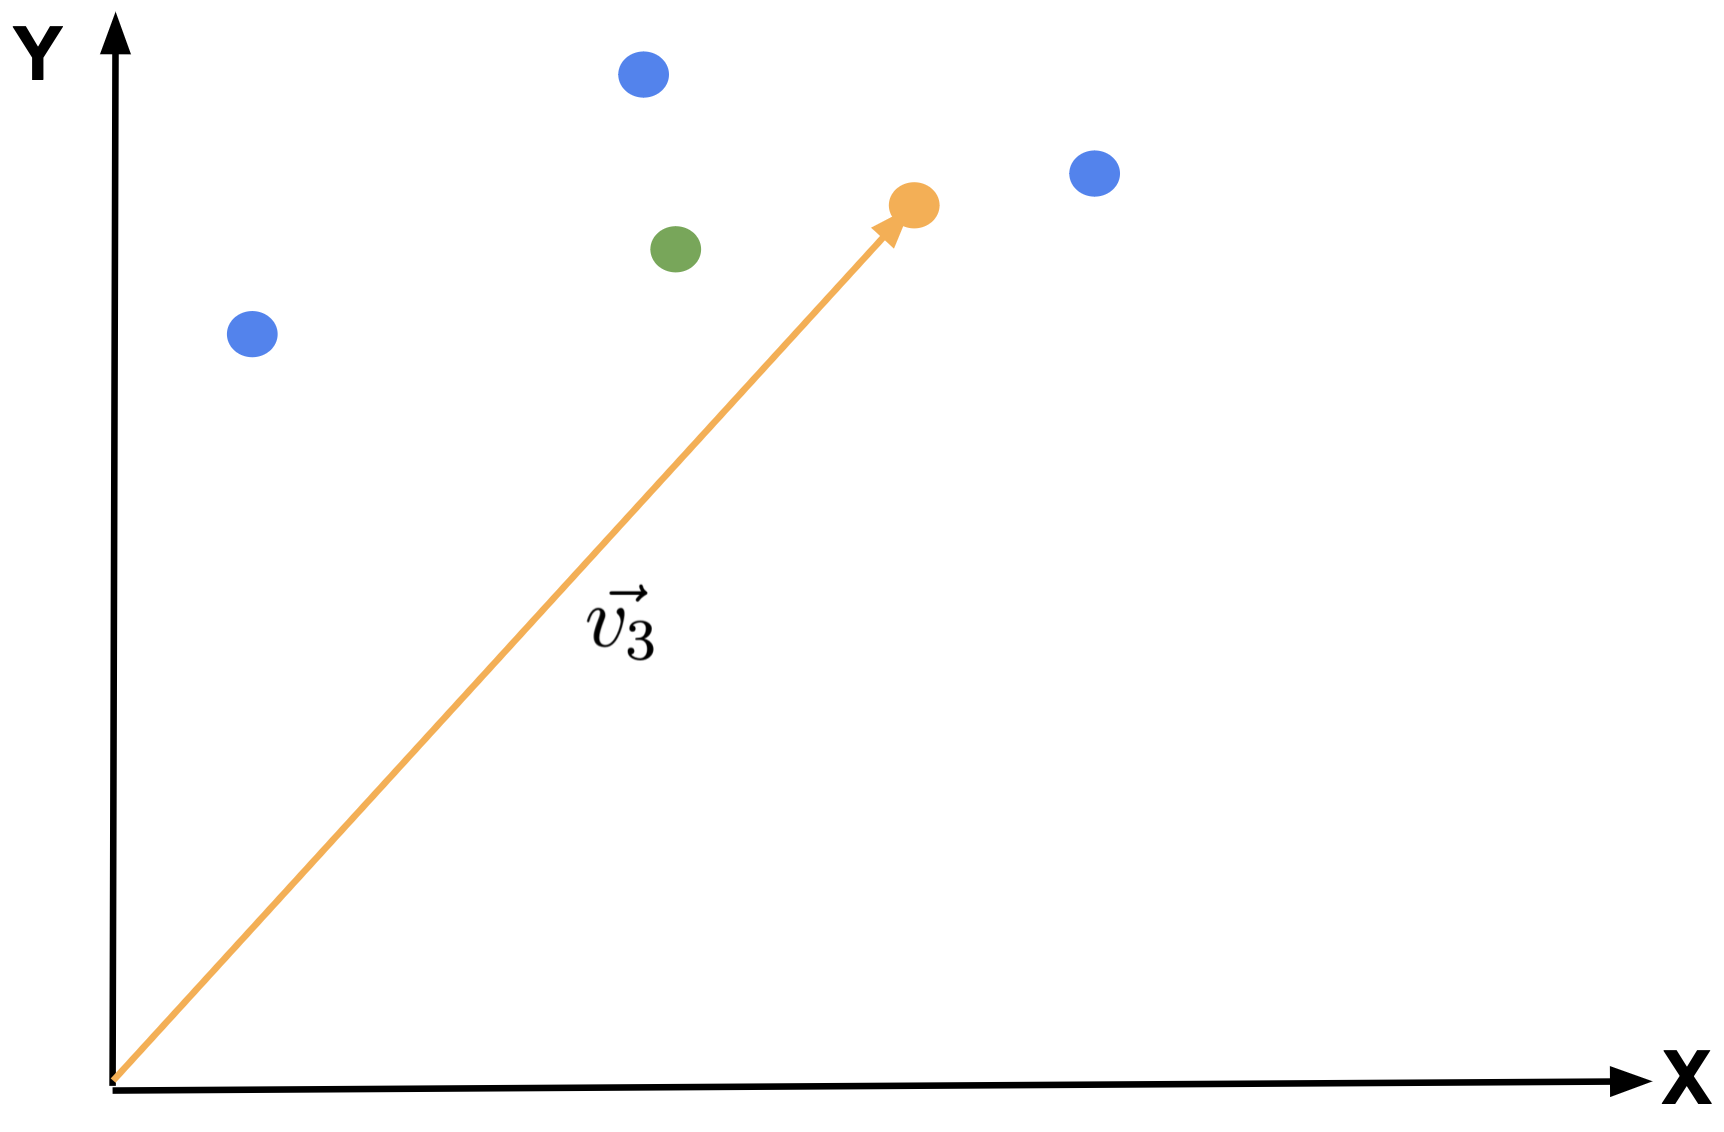

Now we have the same points that before but adding one synthetic point (orange) created from the green point.

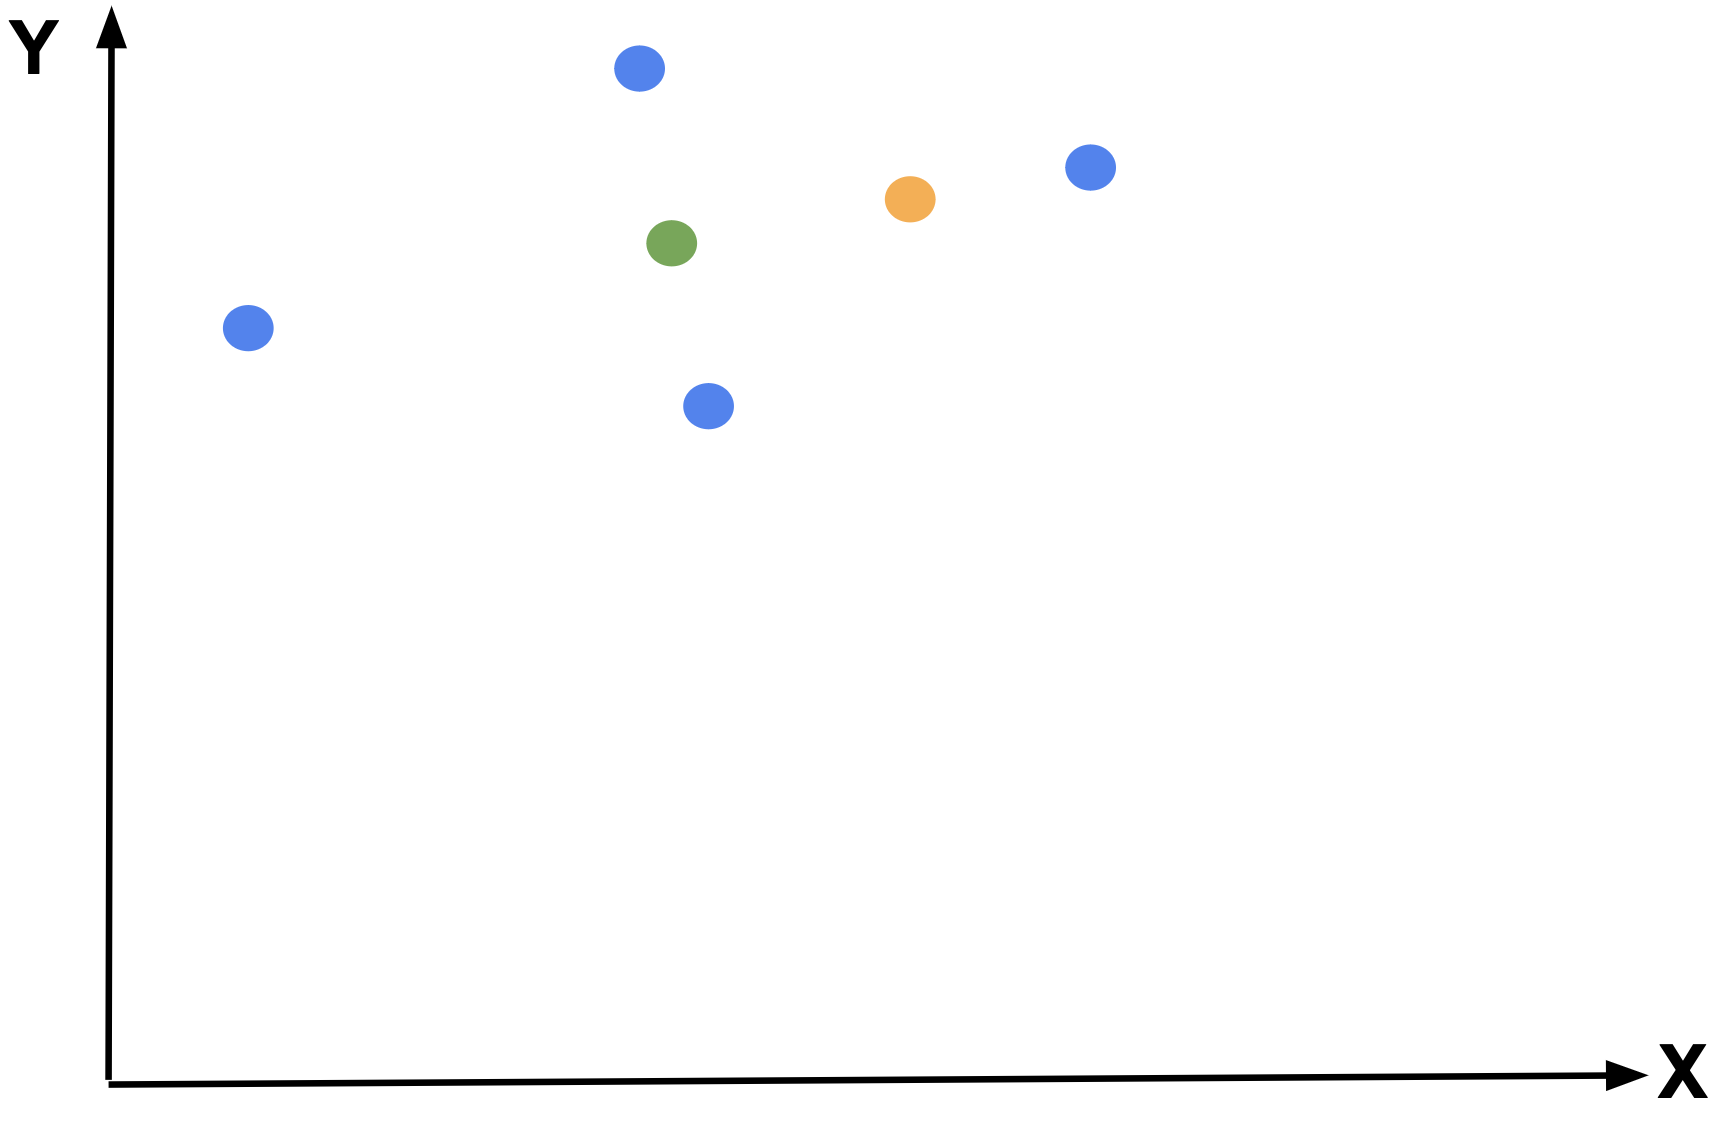

In [17]:
smote = SMOTE(random_state = 0)

In [18]:
X_smote, y_smote = smote.fit_resample(X, y)

In [19]:
y_smote.value_counts()

Class
0        2843
1        2843
dtype: int64

In [20]:
round(y_smote.value_counts(normalize = True)*100, 2)

Class
0        50.0
1        50.0
dtype: float64